<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

This project is focused on exploratory data analysis (EDA). EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to pitfalls and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those beyond this class!

Problems 1 thru 6 use a small dataset on state SAT scores.

Problems 7 thru 12 use a fraction of the Iowa Liquor Sales dataset (described in more detail in question 7).

---

This project includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like stackoverflow that have almost certainly done what you are trying to do.

**Get used to using google for finding code!** You will be using it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [61]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put in dictionary format.

The dictionary format for data will be keys as the column names/headers, and values as the row values for that column.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [4]:
sat_filepath = '/Users/DavisJohnson/Desktop/DSI-SF-4/datasets/state_sat_scores/sat_scores.csv'

### 1.2 Make a pandas DataFrame object with the sat dictionary and also with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [5]:
#There is no real differnce between doing the two. The csv file represents a large dictionry of values
#and is a much more efficient way to upload and manipulate

In [6]:
scores = pd.read_csv(sat_filepath)
#scores.info()
#scores.dtypes
#scores['State'].value_counts()

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values). 

### 1.3 Look at the first ten rows of the DataFrame and describe what the data appears to be. 

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [7]:
#The data appears to show scores (verbal and math) from various states along with a rate, 
#which could be the percentile of how the math and verbal scores rank  

In [8]:
scores.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [9]:
#scores.dtypes
#scores.shape

Variable | Variable Type | Variable Description
--- | --- | ---
State | Object | Two letter acronym for each state represented
Rate | int64 | Perentile Rank
Verbal | int64 | Verbal score out of 800
Math | int64 | Math score out of 800

Rows | Columns
--- | ---
52 | 4

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

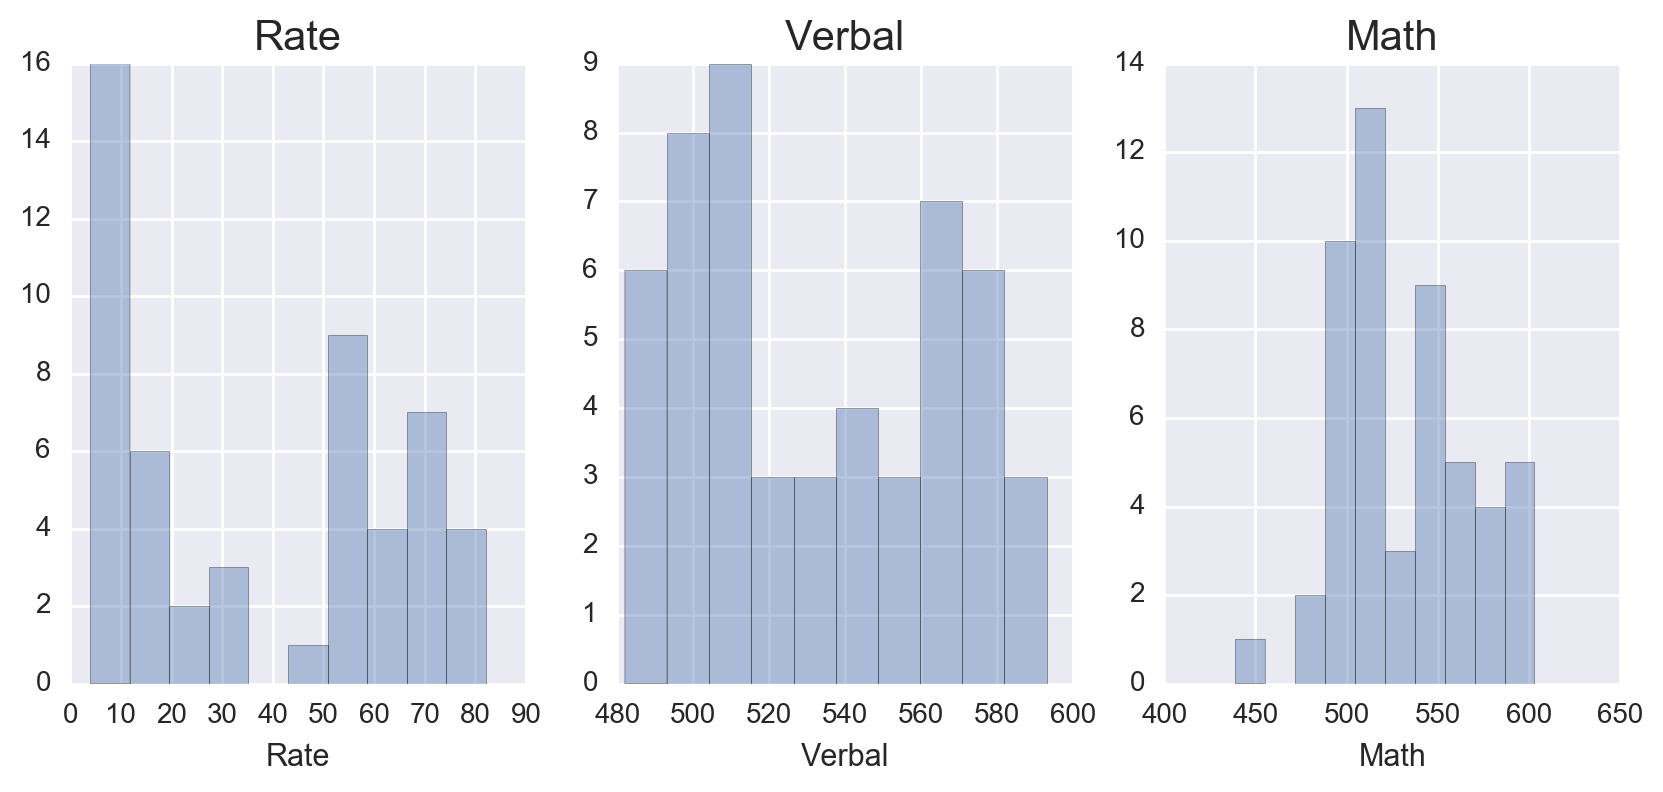

In [10]:
fig, axis_array = plt.subplots(1,3,figsize=(10,4))

axis1, axis2, axis3 = axis_array[0], axis_array[1], axis_array[2]

axis1 = sns.distplot(scores['Rate'], bins=10, kde=False, ax=axis1)
axis2 = sns.distplot(scores['Verbal'], bins=10, kde=False, ax=axis2)
axis3 = sns.distplot(scores['Math'], bins=10, kde=False, ax=axis3)

axis1.set_title('Rate', fontsize=15)
axis2.set_title('Verbal', fontsize=15)
axis3.set_title('Math', fontsize=15)



### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

In [ ]:
#It's better to have a lower "rate" as the higher math and verbal scores correspond to a lower rate.

#From the rate histogram, we can see there are two major clumpings (with a gap in the middle), meaning there
#is a wide distribution of scores - some very high and some very low. This can also be seen when looking at
#the plots of rate vs. the verbal and math scores

#There is a positive correlation between math and verbal scores with a fairly stable linear regression



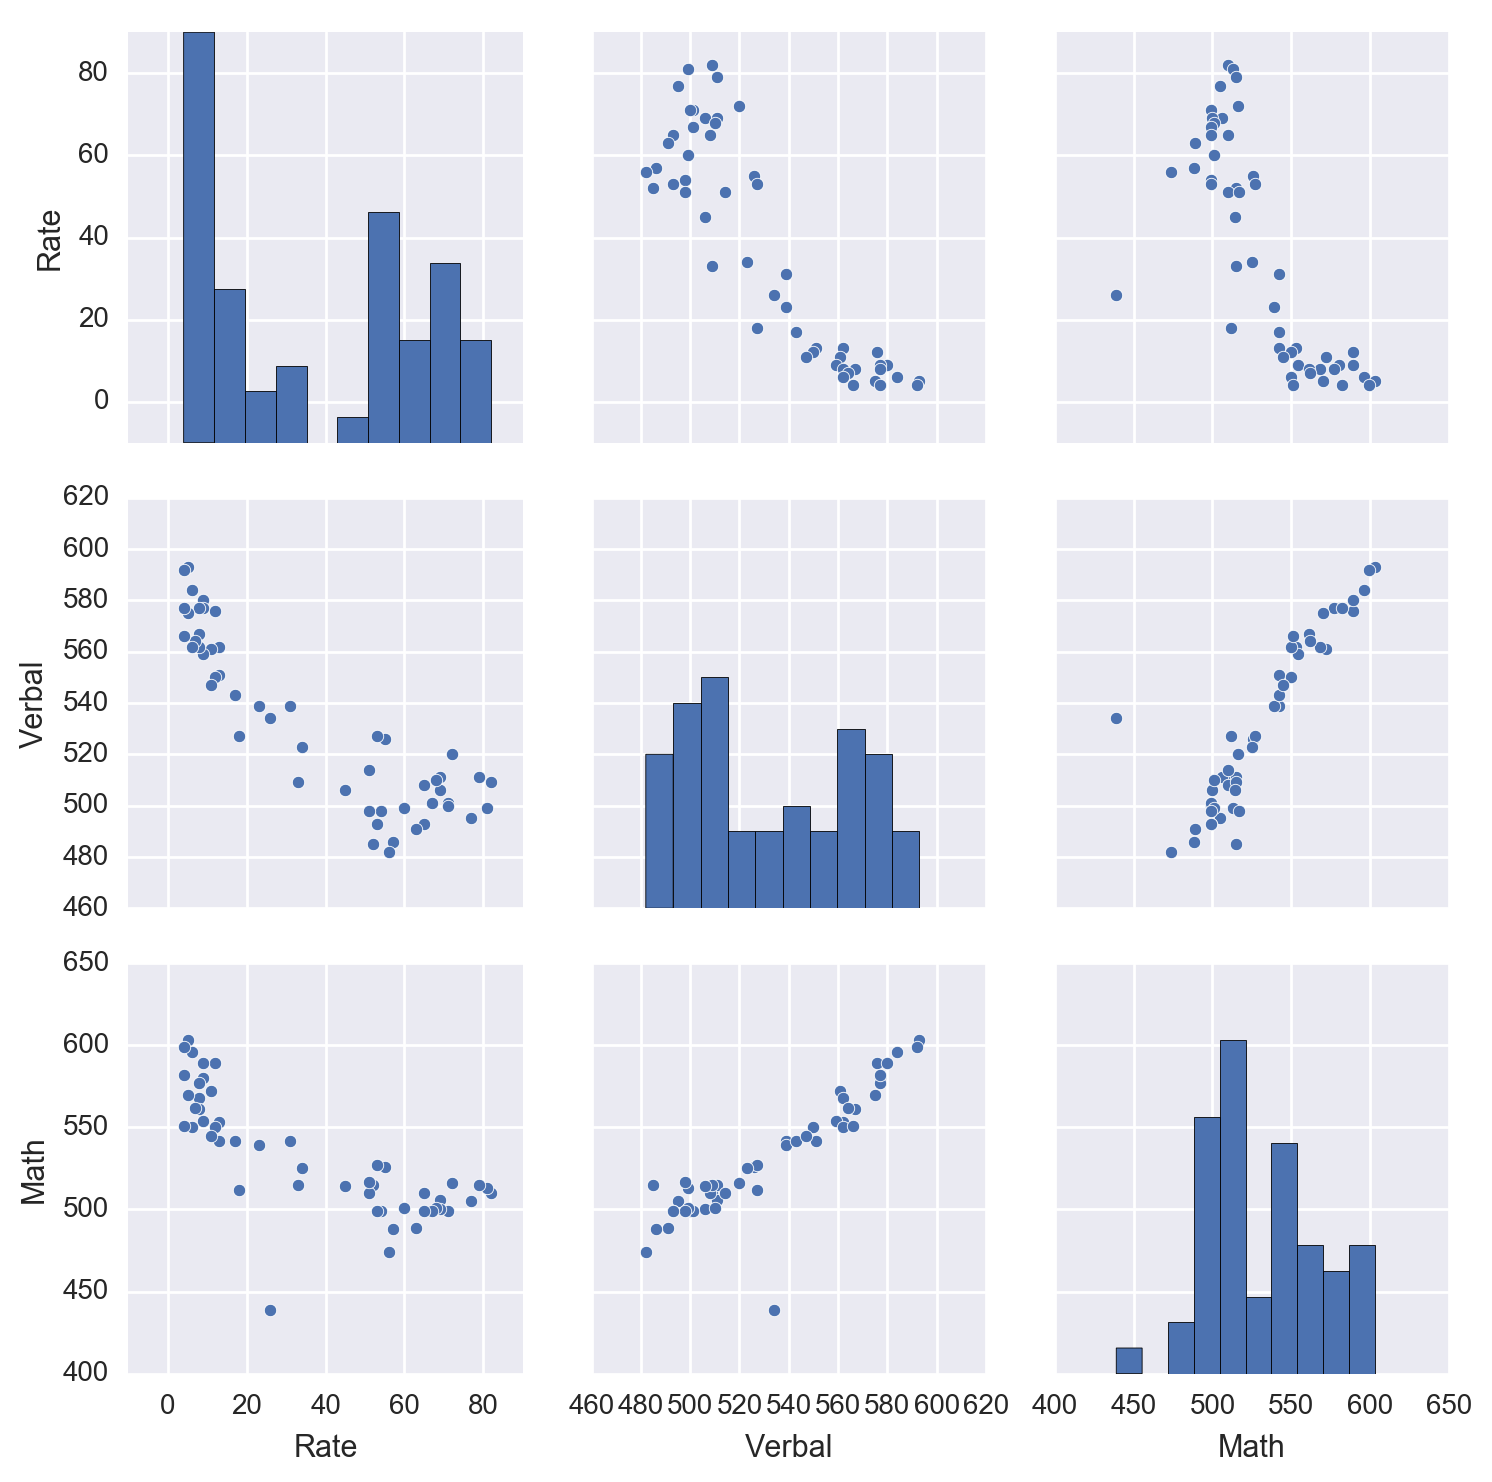

In [11]:
sns.pairplot(scores)
#sns.pairplot(scores, diag_kind="kde", kind="reg")

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built in plotting functions for your data. Read the documentation here to overview and understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

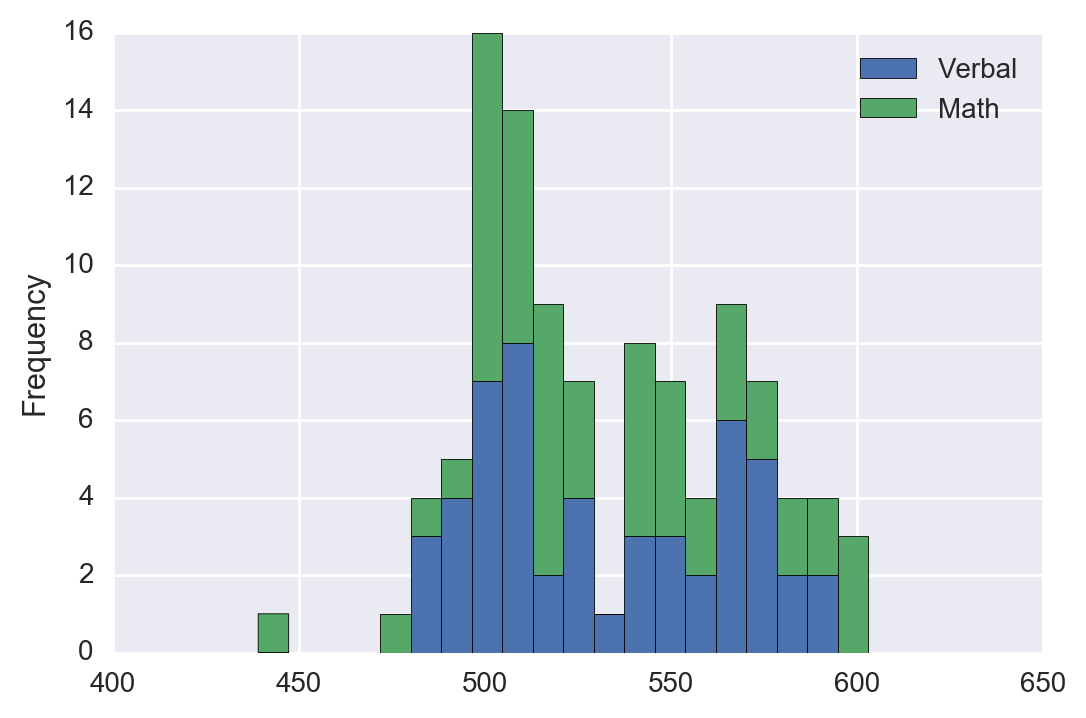

In [12]:
scores[['Verbal','Math']].plot.hist(stacked=True, bins=20)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots (pandas or seaborn)

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

In [ ]:
#You get a better sense of the distribution and range of the data, along with the mean, max, and min - giving a
#more holisitc view of the complete data set

#The y-axis range for rate is different compared to the math and verbal range, thus it isn't an accurate depection
#of the data because they have different parameters

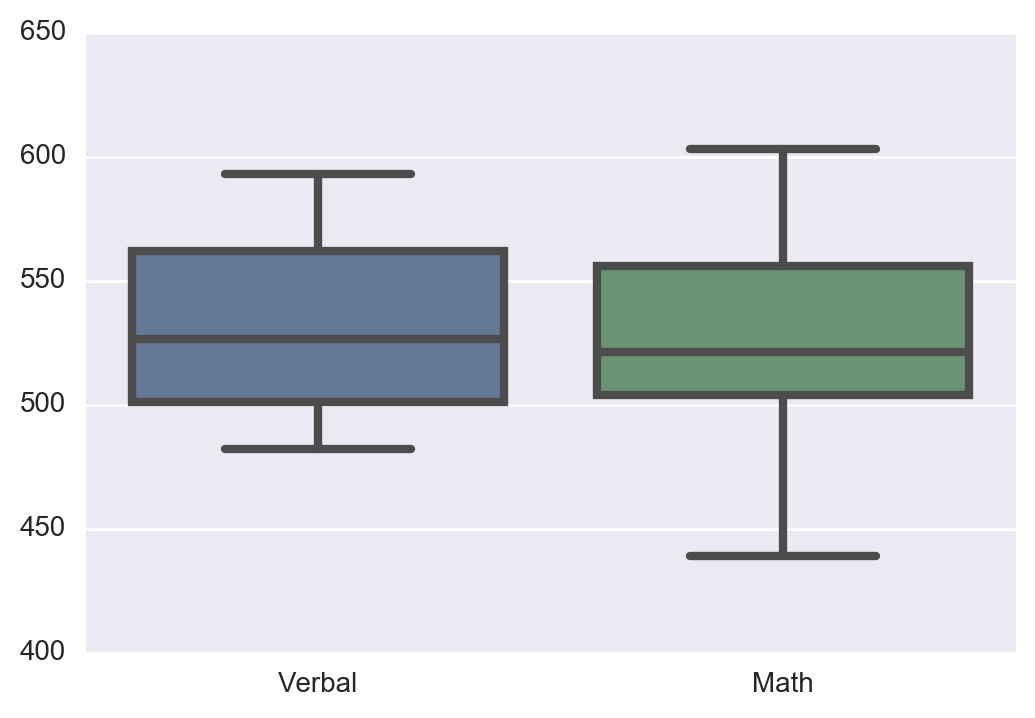

In [13]:
fig = plt.figure(figsize=(6,4))
axis = fig.gca()

axis = sns.boxplot(data=scores[['Verbal','Math']], fliersize=5, linewidth=3, saturation=0.5, ax=axis)
#axis = sns.boxplot(data=scores)

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart (pandas or seaborn)

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [ ]:
#By normalizing the numbers, you can look at the data all on the same graph. This way you can see the difference
#of the distributions and how much they vary within each variable being graphed

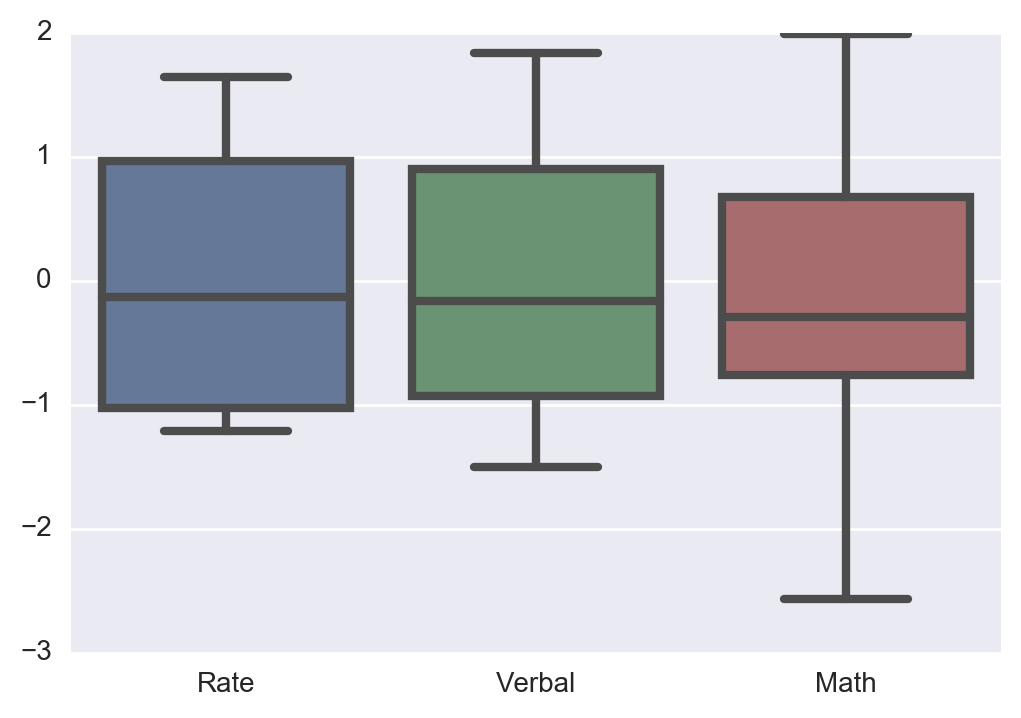

In [14]:
scores_int_variables = scores[['Rate','Verbal','Math']]
scores_normed = (scores_int_variables - scores_int_variables.mean())/scores_int_variables.std()

fig = plt.figure(figsize=(6,4))
axis = fig.gca()

axis = sns.boxplot(data=scores_normed, fliersize=5, linewidth=3, saturation=0.5, ax=axis)


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Recall that masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?



In [ ]:
#The mean is 532 and there are 24 states above the mean. This shows that there is a pretty even distribution for
#verbal scores across the US as about half the country is either above or below the mean. If there were some really
#outlier performing states that brought the mean down or up dramatically, then we'd see a more lopsided state distribution

In [15]:
Verbal_subset = scores.loc[:, ['State', 'Verbal']]
Verbal_subset_mean = Verbal_subset['Verbal'].mean()
print Verbal_subset_mean
Verbal_subset_above_mean = Verbal_subset[Verbal_subset['Verbal'] > Verbal_subset_mean]
#Verbal_subset_above_mean
print len(Verbal_subset_above_mean)

532.019230769
24


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [ ]:
#It's fairly similar with a median of 526 and states above 26. As mentioned above that the distribution of states
#and scores are fairly even, this output reiterates the point by having a very close median and mean score - showing
#that half the scores are roughly above and below the middle value but also the average value

In [16]:
Verbal_subset = scores.loc[:, ['State', 'Verbal']]
Verbal_subset_median = Verbal_subset['Verbal'].median()
print Verbal_subset_median
Verbal_subset_above_median = Verbal_subset[Verbal_subset['Verbal'] > Verbal_subset_median]
#Verbal_subset_above_median
print len(Verbal_subset_above_median)

526.5
26


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [17]:
Difference = scores['Verbal'] - scores['Math']
scores['Difference'] = pd.Series(data=Difference)
#scores


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [18]:
scores1 = scores[['State','Verbal','Math','Difference']]
scores1 = scores1.sort_values('Difference', ascending = False)
scores1 = scores1.iloc[:10,:]
scores1

,State,Verbal,Math,Difference
27,OH,534,439,95
50,MS,566,551,15
29,WV,527,512,15
45,AR,562,550,12
32,NM,551,542,9
31,TN,562,553,9
9,VA,510,501,9
16,DC,482,474,8
8,ME,506,500,6
41,OK,567,561,6


In [19]:
scores2 = scores[['State','Verbal','Math','Difference']]
scores2 = scores2.sort_values('Difference', ascending = True)
scores2 = scores2.iloc[:10,:]
scores2

,State,Verbal,Math,Difference
21,HI,485,515,-30
23,CA,498,517,-19
1,NJ,499,513,-14
33,IL,576,589,-13
44,WI,584,596,-12
36,MI,561,572,-11
3,NY,495,505,-10
47,IA,593,603,-10
37,MN,580,589,-9
51,All,506,514,-8


In [20]:
print 'Highest Verbal to Math Difference:', scores1[['State']].head(3)
print 'Highest Math to Verbal Difference:', scores2[['State']].head(3)

Highest Verbal to Math Difference:    State
27    OH
50    MS
29    WV
Highest Math to Verbal Difference:    State
21    HI
23    CA
1     NJ


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [ ]:
#It shows that there is a positive correlation between the math and verbal scores, but a negative correlation
#between the rate vs. the verbal and math scores (which is what we noticed in the above graphs that a low rate corresponds
#to a high verbal or math score

In [21]:
scores.corr()

,Rate,Verbal,Math,Difference
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
Difference,-0.101412,0.052600,-0.388219,1.000000


### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [ ]:
#count represents the number of values in each column
#mean represents the average value for each column
#std represents the values deviation from the mean
#min represents the lowest value of the column
#max represents the highest value of the column
#% represent the different percentiles of each column

In [22]:
scores.describe()

,Rate,Verbal,Math,Difference
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [310]:
#Covariance measures the variability or spread of the data where correlatioin shows the dependence of the data set and variables

#To get the correlation, you take the covariance and divide it by the product of the two elements standard deviations

#Covariances are tough to compare across different variable ranges as a squared value(ex: sat scores to rates).
#Where the correlation represents the normalized version of the covariance and can compare two different elements
#against one another

In [23]:
scores.cov()

,Rate,Verbal,Math,Difference
Rate,745.387632,-804.355958,-760.803922,-43.552036
Verbal,-804.355958,1104.646682,1077.147059,27.499623
Math,-760.803922,1077.147059,1297.078431,-219.931373
Difference,-43.552036,27.499623,-219.931373,247.430995


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Load Iowa Liquor Sales dataset

---

The state of Iowa provides many data sets on their website, including [this dataset](https://www.dropbox.com/sh/pf5n5sgfgiri3i8/AACkaMeL_i_WgZ00rpxOOcysa?dl=0) which contains transactions for all stores that have a class E liquor license. You can choose one of the following two scenarios.

The data can also be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy), which allows you to explore it graphically and download it (though it doesn't work very well).

NOTE: Some of you may have computer issues with the full dataset. In this case, feel free to use [this 10% dataset version of Iowa liquor sales](https://drive.google.com/file/d/0Bx2SHQGVqWaseDB4QU9ZSVFDY2M/view?usp=sharing). You may want to use it anyway to test and prototype your code since it will be faster, before running it on the full dataset.


In [100]:
iowa_file = pd.read_csv('../../../DSI-SF-4/datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv')
liquor = iowa_file

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 7.1 Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [ ]:
#There are various data types from ints, floats, and objects that represent the sales volume, alcohol type, distributor,
#store, location, and date for Iowa in 2015 and some of 2016

In [33]:
#liquor.info()
#liquor.dtypes
#liquor.head()
#liquor['Date'].unique()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Clean the liquor dataset

---

### 8.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [ ]:
#Dates not in the correct data type

#null values
#liquor_na = liquor.isnull().sum()
#liquor_na

#Sales numbers into ints and removing the '$' sign

In [47]:
#liquor.info()

In [27]:
#liquor['State Bottle Cost'].value_counts()

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 8.2 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Though resolving them may not be required for EDA and analysis, if you want experience with "deeper" cleaning of data this is a great dataset to start practicing with.

Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life for a data scientist. This isn't a kind of programming where things are just right or wrong.

In [57]:
#Null Values

#liquor_na = liquor.isnull().sum()
#liquor_na
#liquor.loc[liquor['County Number'].isnull()] = 'Unknown'
#liquor.loc[liquor['County'].isnull()] = 'Unknown'
#liquor.loc[liquor['Category'].isnull()] = 'Unknown'
#liquor.loc[liquor['Category Name'].isnull()] = 'Unknown'
#liquor_na

In [101]:
#Dates to date type

#liquor.dtypes
liquor['Date'] = pd.to_datetime(liquor['Date'])
#liquor.dtypes

In [109]:
#Convert "$" to ints

#def convert_dollar(x):
#    try:
#       return float(x.replace('$',''))
#    except:
#        return np.nan
    
#liquor['State Bottle Cost'] = liquor['State Bottle Cost'].map(convert_dollar)

#liquor['State Bottle Cost'] = liquor['State Bottle Cost'].str.replace("$","").astype(float)
#liquor['State Bottle Retail'] = liquor['State Bottle Retail'].str.replace("$","").astype(float)
#liquor['Sale (Dollars)'] = liquor['Sale (Dollars)'].str.replace("$","").astype(float)
#liquor.head()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to handle missing data for stores not open for the full 2015 year. Do you impute? Remove the stores? Something else?
3. Implement your plan.
4. Briefly report on what you did and why.


In [ ]:
#In order to make sure we are looking at consistent data, 
#we'll want to take out any null values and only look at data from the year 2015. Since we've
#already changed any null values and converted dates to the correct data type, we can create a mask
#to narrow down the data to the ideal time period

In [129]:
#liquor.sort_values(by='Date', ascending = True)
liquor_cleaned = liquor[(liquor['Date'] >= '2015-01-01') & (liquor['Date'] <= '2015-12-31')].reset_index()
#liquor_cleaned['Date'].unique
liquor_cleaned.head()

,index,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.00,2.38
1,4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.00,5.55
2,5,2015-04-20,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,New Amsterdam Gin,1750,13.32,19.98,6,119.88,10.50,2.77
3,6,2015-08-05,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,Korbel Brandy,750,6.66,9.99,3,29.97,2.25,0.59
4,7,2015-06-25,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,Canadian Club Whisky,1750,15.75,23.63,2,47.26,3.50,0.92


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 10. Examine liquor profits

---

You are a data scientist in residence at the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 10.1 Calculate yearly liquor sales for each store in 2015.

In [160]:
#liquor_cleaned.head()
#liquor_cleaned.info()
liquor_stores = liquor_cleaned[['Store Number', 'Sale (Dollars)']].groupby('Store Number').sum().sort_values(by = 'Sale (Dollars)', ascending = False)
liquor_stores.head()

,Sale (Dollars)
Store Number,
2633,1000783.30
4829,878812.70
3385,441983.55
2512,419746.83
3420,352020.66


### 10.2 Calculate the profit each store is making in 2015.


In [162]:
liquor_profit = liquor_cleaned
liquor_profit['Revenue'] = liquor_profit['State Bottle Retail'] * liquor_profit['Bottles Sold']
liquor_profit['Cost'] = liquor_profit['State Bottle Cost'] * liquor_profit['Bottles Sold']
liquor_profit['Profit'] = liquor_profit['Revenue'] - liquor_profit['Cost']

liquor_profit_final = liquor_profit[['Store Number', 'Sale (Dollars)', 'Bottles Sold', 'Revenue', 'Cost', 'Profit']].groupby('Store Number').sum().sort_values(by='Profit', ascending = False)

liquor_profit_final.head()

,Sale (Dollars),Bottles Sold,Revenue,Cost,Profit
Store Number,,,,,
2633,1000783.30,62923,1000783.30,666966.39,333816.91
4829,878812.70,52681,878812.70,585615.71,293196.99
3385,441983.55,27363,441983.55,294098.93,147884.62
2512,419746.83,27692,419746.83,279603.37,140143.46
3420,352020.66,20868,352020.66,234427.32,117593.34


### 10.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [173]:
liquor_volume = liquor_profit
liquor_volume['Bottle Volume (Liters)'] = liquor_volume['Bottle Volume (ml)'] * .001
liquor_volume['Bottle Volume (Gallons)'] = liquor_volume['Bottle Volume (Liters)'] * .264172
liquor_volume['Profit Per Gallon'] = liquor_volume['Profit'] / liquor_volume['Volume Sold (Gallons)']
#liquor_volume.head()

liquor_volume_profit = liquor_profit[['County', 'Profit Per Gallon']].groupby('County').sum().sort_values(by='Profit Per Gallon', ascending = False)
liquor_volume_profit.head()

,Profit Per Gallon
County,
Polk,979948.172523
Linn,450094.713966
Scott,323548.915015
Black Hawk,285092.638840
Johnson,261311.412450


### 10.4 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [223]:
#liquor_category.head()
#liquor_category.dtypes

In [217]:
#liquor_category = liquor_volume
#liquor_category_na = liquor_category.isnull().sum()
#liquor_category_na.loc[liquor_category_na['Category Name'].isnull()] = 'other'

In [226]:
def category_cat(x):
    try:
        x = x.split()
        for value in x:
            if 'VODKA' in x:
                return 'VODKA'
            elif 'BRANDIES' in x:
                return 'BRANDIES'
            elif 'GINS' in x:
                return 'GINS'
            elif 'WHISKIES' in x:
                return 'WHISKIES'
            elif 'TEQUILA' in x:
                return 'TEQUILA'
            elif 'RUM' in x:
                return 'RUM'
            else:
                return 'Other'
    except:
        return 'Other'
    

liquor_category['Updated Category'] = liquor_category['Category Name'].map(category_cat)


,index,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,...,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Revenue,Cost,Profit,Bottle Volume (Liters),Bottle Volume (Gallons),Profit Per Gallon,Updated Category
0,0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,...,81.00,9.00,2.38,81.00,54.00,27.00,0.75,0.198129,11.344538,BRANDIES
1,4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,...,129.60,21.00,5.55,129.60,86.40,43.20,1.75,0.462301,7.783784,VODKA
2,5,2015-04-20,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,...,119.88,10.50,2.77,119.88,79.92,39.96,1.75,0.462301,14.425993,GINS
3,6,2015-08-05,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,...,29.97,2.25,0.59,29.97,19.98,9.99,0.75,0.198129,16.932203,BRANDIES
4,7,2015-06-25,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,...,47.26,3.50,0.92,47.26,31.50,15.76,1.75,0.462301,17.130435,WHISKIES


### 10.5 Do relationships exist between the broader liquor type and profit?

In [ ]:
#It appears that there are some alcohols that provide more profit for the stores (Whiskies and Vodka),
#but some of the liquors (Rum, Tequila, and Brandies) have the potential to be more lucrative for shops if they could sell more to customers
#based on the profit per gallons sold

In [228]:
liquor_category_profit = liquor_category[['Updated Category', 'Profit', 'Profit Per Gallon']].groupby('Updated Category').sum().sort_values(by='Profit', ascending = False)
liquor_category_profit

,Profit,Profit Per Gallon
Updated Category,,
WHISKIES,2885334.03,1.443286e+06
VODKA,2278921.68,1.030020e+06
Other,1940077.92,1.154435e+06
RUM,1260944.29,4.925967e+05
TEQUILA,521141.83,3.687745e+05
BRANDIES,397357.70,3.324695e+05
GINS,256381.93,1.504268e+05


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 11. Proposing a new liquor tax

---

### The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

In [ ]:
#I approached this problem by looking at the different margins each store had over 2015 and from
#what size bottles the majority of the profit was generated. In general, when grouping by store, the more volume
#of liquor a store sold, meant the higher they would rank on total profit. This was true until looking at the lower
#tiers of volume sold (smaller "mom and pop" stores) - where a store could have a higher total profit by 
#selling less total volume. 
#
#Digging a step further, I grouped in the size of bottle being sold at each store and noticed that the majority
#of the profits were coming from bottles .75 liters or more. Thus, by putting a tax on any liquor .75L or more,
#the tax board would be able to implement a new tax while not targeting any specific type of store.


In [289]:
liquor_tax = liquor_category
#liquor_tax.info()
#liquor_tax['Bottle Volume (Liters)'].unique()


#del liquor_tax['Volume Sold (Gallons)']
#del liquor_tax['Bottle Volume (Gallons)']
#del liquor_tax['Profit Per Gallon']
#del liquor_tax['Updated Category']
#del liquor_tax['Bottle Volume (ml)']
#del liquor_tax['Category']

#liquor_tax['Profit Per Liter'] = liquor_tax['Profit'] / liquor_tax['Volume Sold (Liters)']
#liquor_tax['Cost Per Liter'] = liquor_tax['Cost'] / liquor_tax['Volume Sold (Liters)']
#liquor_tax['Revenue Per Liter'] = liquor_tax['Revenue'] / liquor_tax['Volume Sold (Liters)']

,index,Date,Store Number,City,Zip Code,County Number,County,Category Name,Vendor Number,Item Number,...,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Revenue,Cost,Profit,Bottle Volume (Liters),Profit Per Liter,Cost Per Liter,Revenue Per Liter
0,0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,APRICOT BRANDIES,55,54436,...,12,81.00,9.00,81.00,54.00,27.00,0.75,3.000000,6.000000,9.000000
1,4,2015-08-18,3654,BELMOND,50421,99.0,Wright,VODKA 80 PROOF,297,35918,...,12,129.60,21.00,129.60,86.40,43.20,1.75,2.057143,4.114286,6.171429
2,5,2015-04-20,2569,CEDAR RAPIDS,52402,57.0,Linn,AMERICAN DRY GINS,205,31473,...,6,119.88,10.50,119.88,79.92,39.96,1.75,3.805714,7.611429,11.417143
3,6,2015-08-05,2596,OTTUMWA,52501,90.0,Wapello,AMERICAN GRAPE BRANDIES,85,52806,...,3,29.97,2.25,29.97,19.98,9.99,0.75,4.440000,8.880000,13.320000
4,7,2015-06-25,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,CANADIAN WHISKIES,65,10628,...,2,47.26,3.50,47.26,31.50,15.76,1.75,4.502857,9.000000,13.502857


In [309]:
liquor_tax_store_temp = liquor_tax[['Store Number', 'Volume Sold (Liters)', 'Revenue', 'Cost', 'Profit', 'Revenue Per Liter', 'Cost Per Liter', 'Profit Per Liter']].groupby('Store Number').sum().sort_values(by='Profit', ascending = False)
liquor_tax_store_temp

,Volume Sold (Liters),Revenue,Cost,Profit,Revenue Per Liter,Cost Per Liter,Profit Per Liter
Store Number,,,,,,,
2633,61909.75,1000783.30,666966.39,333816.91,42038.476190,28002.584762,14035.891429
4829,50792.74,878812.70,585615.71,293196.99,39381.800714,26234.571667,13147.229048
3385,31563.00,441983.55,294098.93,147884.62,9119.406190,6074.590000,3044.816190
2512,25921.88,419746.83,279603.37,140143.46,27221.821456,18131.680598,9090.140859
3420,25143.00,352020.66,234427.32,117593.34,6509.807143,4337.329048,2172.478095
3952,18637.38,333311.98,222081.77,111230.21,21245.565684,14157.022543,7088.543141
3814,12984.00,247417.42,164412.94,83004.48,3343.301429,2228.140476,1115.160952
3354,16506.75,240365.94,160121.25,80244.69,5966.573810,3973.114762,1993.459048
3773,12564.22,232460.41,154935.33,77525.08,22985.449762,15319.068810,7666.380952


In [305]:
liquor_tax_store = liquor_tax[['Store Number', 'Bottle Volume (Liters)', 'Volume Sold (Liters)', 'Revenue', 'Cost', 'Profit', 'Revenue Per Liter', 'Cost Per Liter', 'Profit Per Liter']].groupby(['Store Number', 'Bottle Volume (Liters)']).sum().sort_values(by='Profit', ascending = False).sort_index(level=['Store Number','Bottle Volume (Liters)'], ascending = [None, False])

#liquor_tax['Profit Bool'] = liquor_tax['Profit'] < liquor_tax['Profit Per Gallon']

In [306]:
liquor_tax_store

Volume Sold (Liters)   Revenue      Cost  \
Store Number Bottle Volume (Liters)                                             
9018         0.750                                 225.00   6435.00   4290.00   
9013         0.750                                 171.00   2217.48   1477.68   
9010         0.750                                 189.00   5129.64   3419.04   
             0.375                                   9.00    304.32    202.80   
             0.200                                  14.40    324.00    216.00   
9002         0.750                                 828.00  22643.64  15092.16   
             0.375                                 414.00  15056.88  10034.28   
9001         1.125                                  27.00   1566.00   1044.00   
             0.750                                 589.50  25383.84  16921.80   
             0.375                                  22.50   1258.68    839.04   
5215         0.750                                   1.50     45.00     30.00   
             0.300                                   0.30     11.03      7.35   
5213         0.200                                   9.60    180.00    120.00   
5212         1.750                                  10.50     64.80     43.20   
             0.750                                  22.50    309.36    206.16   
             0.375                                   3.75    130.38     86.90   
5207         3.000                                   3.00     44.58     29.72   
             1.750                                  29.75    422.30    280.01   
             0.750                                   4.50    101.64     67.76   
             0.600                                   1.80     31.02     20.68   
             0.375                                  48.01    771.77    514.33   
             0.200                                  48.00   1826.64   1217.76   
5206         1.750                                   7.00     47.04     31.36   
             0.750                                  15.75    374.66    249.72   
             0.600                                   0.60     10.20      6.80   
             0.375                                   3.00     69.00     46.00   
5205         1.000                                   2.00     12.08      7.72   
             0.750                                   1.50     26.94     17.96   
5204         0.750                                  12.00    177.70    118.44   
             0.600                                   1.20     23.76     15.84   
...                                                   ...       ...       ...   
2190         0.100                                  63.40   1075.80    715.44   
2178         1.750                                 990.50  10337.98   6845.36   
             1.000                                 513.00   6640.28   4425.79   
             0.750                                 269.25   4820.23   3204.53   
             0.600                                   6.00    300.00    200.00   
             0.500                                   7.00    140.66     93.73   
             0.375                                  81.77   1362.19    907.83   
             0.200                                  49.60    722.84    481.24   
2152         1.750                                 269.50   2138.81   1413.41   
             1.000                                 269.00   4280.62   2853.05   
             0.750                                  77.25   1140.79    759.99   
             0.375                                  17.62    160.86    107.10   
2130         3.000                                   3.00     44.58     29.72   
             1.750                                 315.00   3214.38   2142.60   
             1.000                                5400.00  80325.72  53519.28   
             0.750                                 979.50  25317.75  16876.04   
             0.600                                   8.40    140.22 

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 12. Time-related effects

---

You could imagine that liquor sales might be affected by a variety of effects related to time. Do people buy more beer in the summer? Do liquor sales skyrocket in december? Do people buy less liquor on Tuesdays?

You have the date of sales in your dataset, which you can use to pull out time components.

1. Come up with 2 different hypotheses about how liquor sales may vary with time-related variables. 
2. Create a visualization exploring each hypothesis.
3. Write brief concluding remarks on what you observed.
